In [1]:
import numpy as np
import pandas as pd
import seaborn as  sn
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

In [35]:
df = pd.read_table('lendingdata.txt', parse_dates = ['issue_d'],low_memory = False)

In [3]:
df.shape

(855969, 73)

In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

We have data of those persons to whom loan has issued. The default_ind column has the values '0' and '1' that specify whether they are able to repay the loan or not.

In [13]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
 df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

# Exploratory data analysis

In [16]:
df['default_ind'].value_counts()
#0 = successfully paid

0    809502
1     46467
Name: default_ind, dtype: int64

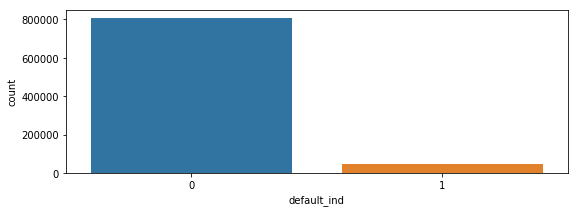

In [19]:
plt.figure(figsize = (9,3))
sn.countplot( x= 'default_ind', data = df)

We see that out of 855969 people  more than 8 lac people were not able to repay the loan

In [4]:
df['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

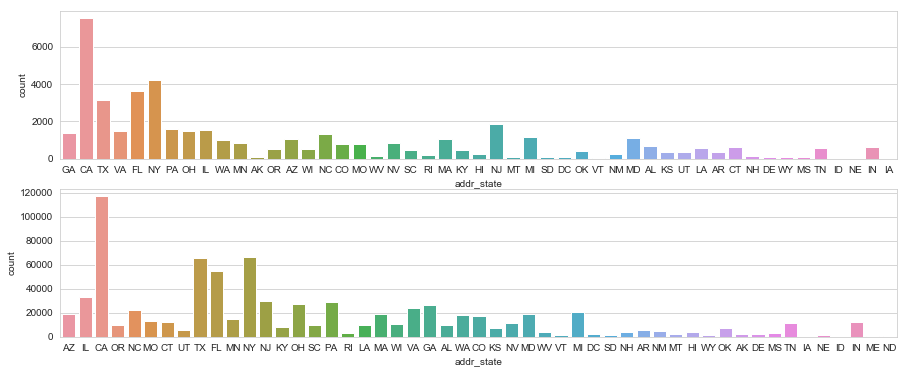

In [24]:
sn.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.subplot(2,1,1)
sn.countplot(x = 'addr_state', data = df[(df['default_ind'] == 0)])
#defaulters----
plt.subplot(2,1,2)
sn.countplot(x = 'addr_state', data = df[(df['default_ind'] == 1)])

In [ ]:
Majority of people from CA have successfully repayed the loan

In [5]:
df['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [27]:
df['annual_inc'].max()

9500000.0

In [31]:
df[(df['annual_inc'] >= 9000000.0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
484053,65945334,70640084,11000.0,11000.0,11000.0,36 months,6.89,339.10,A,A3,...,NaN,NaN,NaN,NaN,NaN,41900.0,NaN,NaN,NaN,0
671886,54067210,57607924,24000.0,24000.0,24000.0,60 months,7.89,485.38,A,A5,...,NaN,NaN,NaN,NaN,NaN,84200.0,NaN,NaN,NaN,0


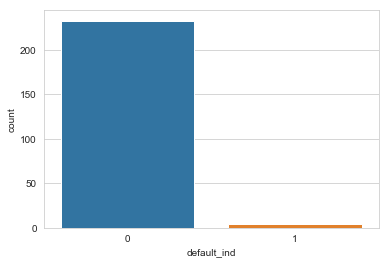

In [4]:
sn.countplot( x= "default_ind", data = df[(df['annual_inc'] >=900000.0)])

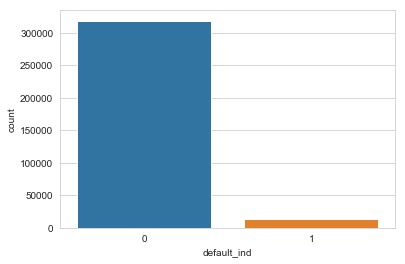

In [6]:
sn.countplot( x= "default_ind", data = df[(df['annual_inc'] >=75000.0)])

There are hardly 5-10 people who have salary > 75000 but still are defaulters

In [7]:
df['annual_inc_joint'].isnull().sum()

855527

In [ ]:
#loan amount and funded amount are same, i.e what was applied for they got


In [9]:
df.loc[df['default_ind'] == 1,'application_type'].value_counts()

INDIVIDUAL    46467
Name: application_type, dtype: int64

In [ ]:
#joint people are not defaulters
#desc and delinq_2 yrs are not needed

H:\Anaconda_work\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


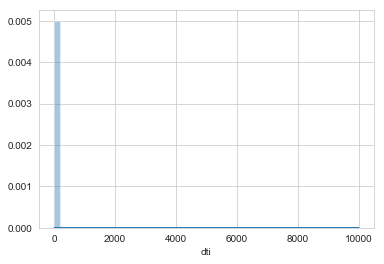

In [10]:
#dti
#DTI = total of money debt payments(credict cards, lians mortgage etc)/gross monthly income
#banks prefer less dti
sn.distplot(df['dti'])

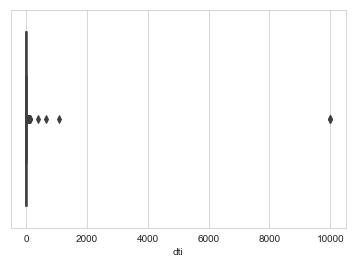

In [11]:
sn.boxplot(df['dti'])

In [13]:
data = df[(df['dti']>=100)]
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
454491,67405134,72216846,6550.0,6550.0,6550.0,36 months,17.86,236.34,D,D5,...,93.7,1.0,5.0,15885.0,88.0,34400.0,1.0,0.0,3.0,0
455963,67555887,72409620,15000.0,15000.0,15000.0,36 months,16.55,531.44,D,D2,...,71.3,1.0,2.0,10039.0,69.9,31600.0,1.0,0.0,2.0,0
462577,66415476,71141331,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,...,51.8,1.0,1.0,3527.0,78.5,8100.0,1.0,0.0,1.0,0
466829,66495833,71221670,20000.0,20000.0,20000.0,60 months,18.20,510.05,E,E1,...,NaN,NaN,NaN,NaN,NaN,31200.0,NaN,NaN,NaN,0
498969,65571637,70192361,15000.0,15000.0,15000.0,36 months,15.41,523.00,D,D1,...,NaN,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,0
508976,65199509,69726237,3700.0,3700.0,3700.0,36 months,12.59,123.94,C,C2,...,NaN,NaN,NaN,NaN,NaN,18700.0,NaN,NaN,NaN,0
509784,64957302,69484023,19000.0,19000.0,19000.0,60 months,16.99,472.10,D,D3,...,NaN,NaN,NaN,NaN,NaN,57400.0,NaN,NaN,NaN,0
517482,64078746,68509498,12000.0,12000.0,12000.0,36 months,19.99,445.91,E,E4,...,NaN,NaN,NaN,NaN,NaN,2300.0,NaN,NaN,NaN,0
521134,63671798,68067520,12000.0,12000.0,11900.0,60 months,17.86,303.81,D,D5,...,NaN,NaN,NaN,NaN,NaN,22000.0,NaN,NaN,NaN,0
540528,62206500,66403255,5000.0,5000.0,5000.0,36 months,13.99,170.87,C,C4,...,NaN,NaN,NaN,NaN,NaN,11500.0,NaN,NaN,NaN,0


In [15]:
#dti of defaulters
#People who are not able to pay the loan have an avg dti of  18.1036773967
df.loc[df['default_ind'] ==0, 'dti'].mean()

18.10367739672037

In [ ]:
#Employement length------
#frequency of people who applied for loan based on their emp length

plt.figure(figsize = (10,5))


In [ ]:
#funded amount-------
#funded amnt and loan amnt are same so we need only b/w these two

In [18]:
df.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000.0,5000.0,4975.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
4,3000.0,3000.0,3000.0
5,5000.0,5000.0,5000.0
6,7000.0,7000.0,7000.0
7,3000.0,3000.0,3000.0
8,5600.0,5600.0,5600.0
9,5375.0,5375.0,5350.0


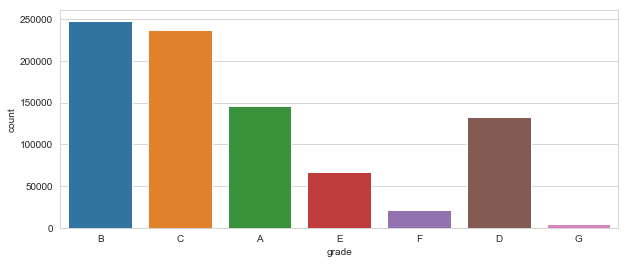

In [21]:
plt.figure(figsize =(10,4))
sn.countplot(df['grade'])

In [19]:
df.loc[df['default_ind'] == 1,'grade'].value_counts()

C    13002
D    10798
B     9717
E     6459
F     3013
A     2664
G      814
Name: grade, dtype: int64

In [ ]:
#C grade have max defaulters

In [22]:
#home ownership------
df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

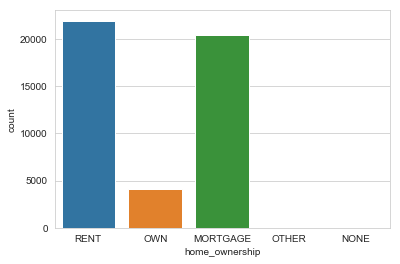

In [23]:
#defaulters on the basis of home ownership-------
#default_ind =1 (defaulters)
sn.countplot(x = 'home_ownership', data = df[(df['default_ind'] == 1)])

In [ ]:
#Maximum defaulters are in the rent category
#Around 4000 people with their own houses haven't repayed the loan yet i.e are defaulters

In [ ]:
#initial listing status-------
df['list_status']

In [25]:
#installment --------
df['installment'].head(5)

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [28]:
#avg installment of defaulters
df.loc[df['default_ind'] == 1,'installment'].mean()

441.07321884347874

In [ ]:
#Defaulters have an avg installment of 441.07322

In [29]:
#avg installment of non- defaulters
df.loc[df['default_ind'] == 0,'installment'].mean()

435.9605249278156

In [30]:
#int rate------
df['int_rate'].describe()

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

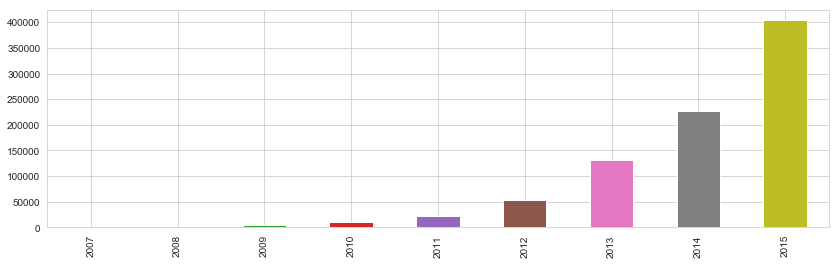

In [37]:
#issue_d -------
plt.figure(figsize =(14,4))
df['issue_d'].dt.year.value_counts().sort_index().plot.bar()

In [40]:
df.loc[df['default_ind'] ==1,'last_credit_pull_d']

1         Sep-2013
8         Aug-2012
9         Mar-2013
12        Nov-2012
14        Mar-2014
21        Jan-2016
24        Mar-2013
26        Jan-2016
27        May-2013
46        Dec-2014
50        Mar-2015
53        Dec-2012
55        Jan-2016
64        Jun-2015
66        Jan-2016
68        Oct-2013
71        Jan-2016
97        Dec-2015
100       May-2013
105       Jan-2016
114       Jan-2015
120       Jul-2015
121       Nov-2013
124       Sep-2014
131       Jan-2016
137       Mar-2014
145       Oct-2015
151       Nov-2013
153       Jan-2016
155       Jan-2016
            ...   
855236    Jan-2016
855257    Apr-2015
855336    Jan-2016
855387    Dec-2015
855407    Jan-2016
855418    Jan-2016
855434    Jan-2016
855477    Dec-2015
855487    Dec-2015
855548    Jun-2015
855556    Jan-2016
855610    Aug-2015
855622    Dec-2015
855657    May-2015
855704    Jan-2016
855710    Sep-2015
855729    Jan-2016
855730    Dec-2015
855755    Jan-2016
855778    Jan-2016
855791    Dec-2015
855850    Ja

In [38]:
#loan amount deatails
df['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [41]:
# open_acc
df['open_acc'].describe()

count    855969.000000
mean         11.542447
std           5.308094
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [42]:
#policy code
df['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [ ]:
#All values are same , lets leave it for now

In [45]:
#public records
df['pub_rec'].describe()

count    855969.000000
mean          0.194537
std           0.581585
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

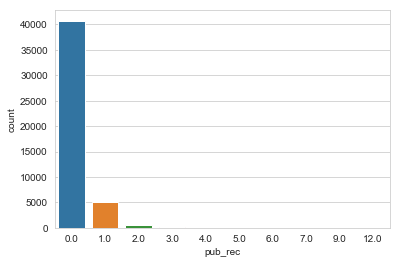

In [47]:
sn.countplot(x= 'pub_rec', data = df[(df['default_ind']==1)])

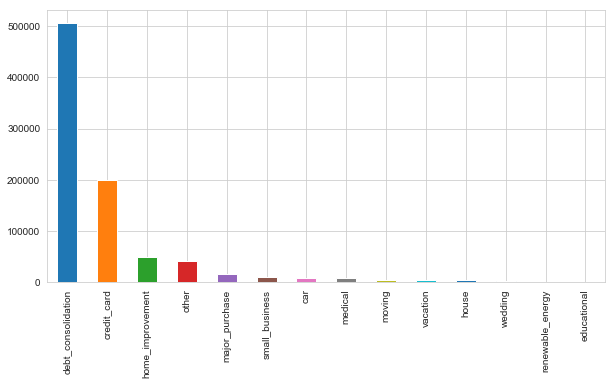

In [48]:
#purpose----
df.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))

In [49]:
#Payment plan
df['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [ ]:
#Most of the values are 'n', so not needed.Same for 'recoveries'

In [50]:
#Sub_grade
df['sub_grade'].value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

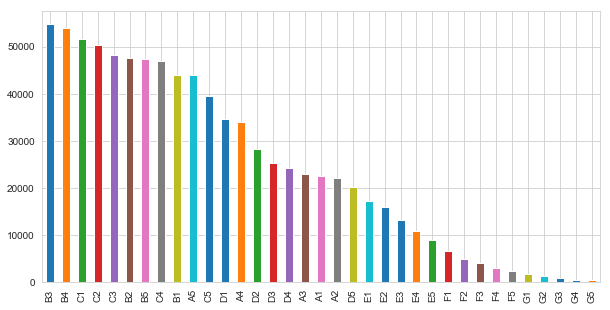

In [58]:
df.sub_grade.value_counts(ascending=False).plot.bar(figsize=(10,5),)

In [56]:
#term---
df['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [ ]:
sn.countplot(x)

In [59]:
#total_acc
df['total_acc'].isnull().sum()

0

In [60]:
df['total_acc'].value_counts()

22.0     31159
20.0     30955
21.0     30917
19.0     30545
23.0     30213
18.0     30031
24.0     29986
17.0     29671
25.0     28660
16.0     28143
26.0     28049
15.0     26907
27.0     26683
14.0     25390
28.0     25243
29.0     24226
13.0     23828
30.0     23012
12.0     21341
31.0     21286
32.0     20198
11.0     19216
33.0     18462
34.0     17301
10.0     16760
35.0     15916
36.0     14662
9.0      14138
37.0     13598
38.0     12141
         ...  
113.0        3
100.0        3
116.0        3
104.0        2
107.0        2
109.0        2
112.0        1
138.0        1
137.0        1
125.0        1
135.0        1
156.0        1
126.0        1
130.0        1
129.0        1
103.0        1
140.0        1
150.0        1
146.0        1
121.0        1
114.0        1
151.0        1
119.0        1
118.0        1
162.0        1
108.0        1
111.0        1
169.0        1
117.0        1
127.0        1
Name: total_acc, Length: 134, dtype: int64

In [63]:
df['total_acc'].describe()

count    855969.000000
mean         25.269269
std          11.818841
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [71]:
df['total_rec_int'].value_counts()

0.00        9362
82.76        138
174.90       123
71.33        123
283.29       119
41.37        113
130.12       112
258.02       108
194.92       108
319.41       107
451.32       106
79.47        104
475.52       102
122.73       102
510.60        98
358.33        94
390.61        94
383.29        93
158.96        92
527.97        92
49.65         91
145.89        88
218.59        88
429.99        87
308.02        87
364.36        85
497.15        85
146.88        83
153.41        83
173.19        83
            ... 
421.55         1
11888.32       1
519.82         1
1946.30        1
4174.29        1
6650.73        1
1035.53        1
1503.52        1
5386.83        1
9027.62        1
6533.52        1
6690.19        1
75.08          1
1637.57        1
5720.57        1
8616.02        1
14533.99       1
15903.72       1
3976.07        1
3740.09        1
4738.81        1
908.14         1
2979.67        1
461.74         1
5162.17        1
2271.47        1
9803.06        1
4178.21       

In [73]:
df['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

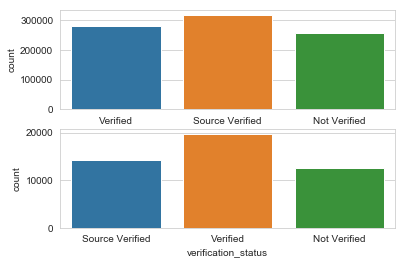

In [81]:
plt.subplot(2,1,1)
sn.countplot(x = 'verification_status', data = df)

plt.subplot(2,1,2)
sn.countplot(x = 'verification_status', data = df[(df['default_ind'] == 1)])

In [ ]:
#Verified has max no. of defaulters

In [72]:
df['total_rec_int'].describe()

count    855969.000000
mean       1755.046221
std        2081.692980
min           0.000000
25%         451.270000
50%        1076.910000
75%        2233.980000
max       24205.620000
Name: total_rec_int, dtype: float64

In [64]:
#verification status
df['verification_status'].isnull().sum()

0

In [65]:
df['tot_cur_bal'].isnull().sum()

67313

In [67]:
df['tot_coll_amt'].isnull().sum()

67313

In [69]:
df['acc_now_delinq'].isnull().sum()

0

Text(0.5, 1.0, 'Amount Funded')

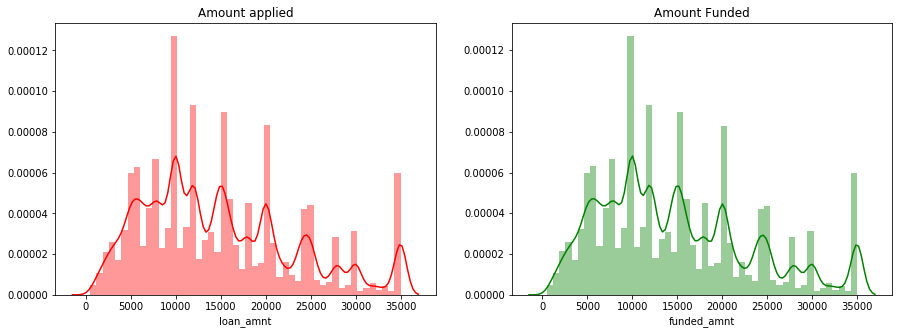

In [42]:
fig,ax = plt.subplots(1,2, figsize =(15,5))
sn.distplot( train['loan_amnt'], ax = ax[0],color ='red')
sn.distplot( train['funded_amnt'], ax = ax[1], color =  'green')
ax[0].set_title("Amount applied")
ax[1].set_title("Amount Funded")

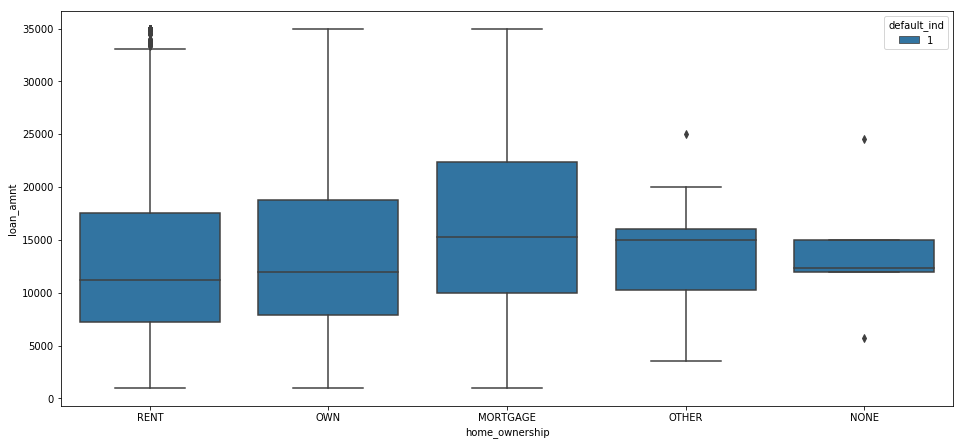

In [11]:
d = train.loc[train['default_ind'] == 1]
plt.figure(figsize = (16,16))
plt.subplot(211)
sn.boxplot(data = d, x= 'home_ownership', y= 'loan_amnt', hue = 'default_ind')

# Data cleaning

In [9]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [38]:
#Some features are not needed lets remove them
not_needed = df[['id','member_id','desc','inq_last_12m','total_cu_tl','inq_fi','all_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint','annual_inc_joint','dti_joint']]

In [39]:
df = df.drop(not_needed, axis =1)

In [40]:
df.shape

(855969, 57)

In [41]:
not_needed2 = ['sub_grade','emp_title','title','zip_code',
           'addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [42]:
df = df.drop(not_needed2, axis =1)

In [43]:
df.shape

(855969, 49)

In [44]:
train =  df[df['issue_d'] < 'Jun-2015']
test =  df[df['issue_d'] >= 'Jun-2015']

In [45]:
X= train
Y= X.pop('default_ind')

In [46]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_jobs=-1,n_estimators=50)

In [48]:
#lets check the time taken to train the model
%time tree.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [6]:
df['funded_amnt'].max

<bound method Series.max of 0          5000.0
1          2500.0
2          2400.0
3         10000.0
4          3000.0
5          5000.0
6          7000.0
7          3000.0
8          5600.0
9          5375.0
10         6500.0
11        12000.0
12         9000.0
13         3000.0
14        10000.0
15         1000.0
16        10000.0
17         3600.0
18         6000.0
19         9200.0
20        20250.0
21        21000.0
22        10000.0
23        10000.0
24         6000.0
25        15000.0
26        15000.0
27         5000.0
28         4000.0
29         8500.0
           ...   
855939    20000.0
855940    10300.0
855941     4200.0
855942    15000.0
855943    15000.0
855944     6000.0
855945    26950.0
855946    23000.0
855947    18700.0
855948    25000.0
855949    25000.0
855950    26500.0
855951    21000.0
855952     8000.0
855953    12000.0
855954    10775.0
855955     7000.0
855956     6225.0
855957    10000.0
855958    13150.0
855959     4000.0
855960     7500.0
855961    10850.0
